puntos dentro de la curva 3470
[[1.52107537 0.03131776]
 [0.9820086  0.06737091]
 [1.33120783 0.89186123]
 ...
 [0.46352685 0.30223485]
 [0.42569301 0.23789337]
 [0.50932466 0.08199944]]


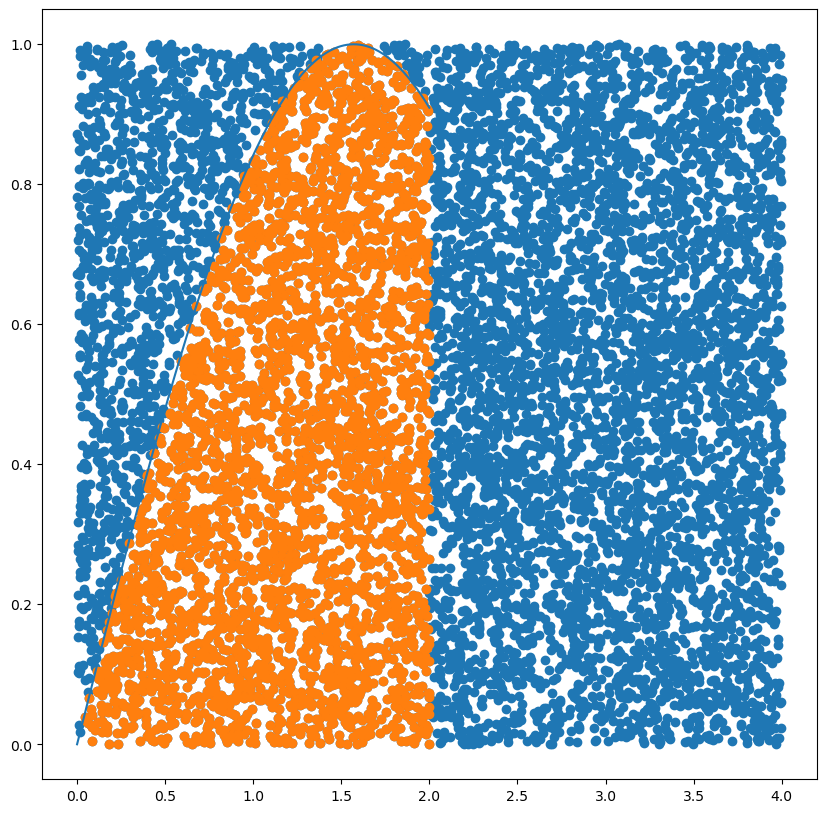

0.6939999994653951


In [56]:
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy import optimize

a=0
b=2

def funcion(z):
    return abs(math.sin(z))

prueba_funcion = funcion

def integra_mc(fun, a, b, num_puntos=10000):


    # generar puntos--------------------
    x = np.random.rand(num_puntos)*b*2
    y = np.random.rand(num_puntos)



    ###generar valores de funcion
    z = np.linspace(a,b,num_puntos)
    f_z=[fun(i) for i in z]

    ##saber el maximo valor de la funcion de forma manual
    maximo_valor= max([fun(i) for i in z])


    ##conteo de puntos dentro del area
    puntos=np.column_stack((x,y))



    # Definir la función de filtro
    # def valor_y_menor_al_maximo(sublist):
    #     return sublist[1] < maximo_valor
    
    def valor_y_menor_a_la_curva(sublist):
        return fun(sublist[0])>sublist[1]


    def valor_x_entre_a_b(sublist):
        return sublist[0] >a and sublist[0]<b

    # Filtrar el array utilizando la función numpy.where y numpy.apply_along_axis
    puntos_dentro_la_curva = puntos[np.apply_along_axis(valor_y_menor_a_la_curva, 1, puntos)] ##para que sean menor al maximo
    puntos_dentro_la_curva = puntos_dentro_la_curva[np.apply_along_axis(valor_x_entre_a_b,1,puntos_dentro_la_curva)] ##para que este entre a y b
    print(f'puntos dentro de la curva {len(puntos_dentro_la_curva)}')

    x_dentros,y_dentros=np.hsplit(puntos_dentro_la_curva, 2)


    ## valores de puntos
    plt.figure(figsize=(10,10))
    plt.scatter(x,y)
    plt.scatter(x_dentros,y_dentros)
    print(puntos_dentro_la_curva)
    plt.plot(z, f_z)
    plt.show()

    integral = len(puntos_dentro_la_curva)/num_puntos *(b-a)* maximo_valor
    return integral


if __name__=='__main__':
    print(integra_mc(prueba_funcion,a,b))

